In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import glob

Opened studies/moralnet/config.yml


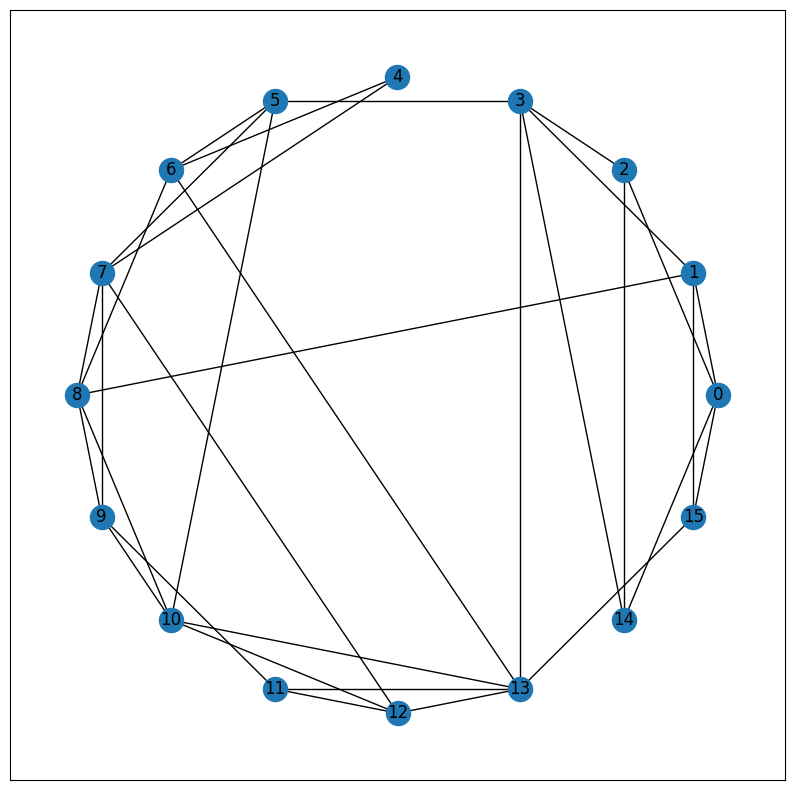

In [3]:
from src import generate

graphs = generate("studies/moralnet/config.yml", test=True)

In [56]:
graph_data = nx.node_link_data(graphs[0])

nodes = graph_data['nodes']
dyads = [{edge[e] for e in edge} for edge in graph_data['links']]

rounds = [0,1,2]
interaction_sequence = {}
for i in rounds:
    interactions = []
    for node in nodes:
        print(node)
        
    interaction_sequence[f"round_{i}"] = interactions
interaction_sequence

{'id': 0}
{'id': 1}
{'id': 2}
{'id': 3}
{'id': 4}
{'id': 5}
{'id': 6}
{'id': 7}
{'id': 8}
{'id': 9}
{'id': 10}
{'id': 11}
{'id': 12}
{'id': 13}
{'id': 14}
{'id': 15}
{'id': 0}
{'id': 1}
{'id': 2}
{'id': 3}
{'id': 4}
{'id': 5}
{'id': 6}
{'id': 7}
{'id': 8}
{'id': 9}
{'id': 10}
{'id': 11}
{'id': 12}
{'id': 13}
{'id': 14}
{'id': 15}
{'id': 0}
{'id': 1}
{'id': 2}
{'id': 3}
{'id': 4}
{'id': 5}
{'id': 6}
{'id': 7}
{'id': 8}
{'id': 9}
{'id': 10}
{'id': 11}
{'id': 12}
{'id': 13}
{'id': 14}
{'id': 15}


{'round_0': [], 'round_1': [], 'round_2': []}

In [36]:
len({0,1}.intersection({2,3}))

0

In [66]:
nodes_in_round = set()
interactions = []
for dyad in dyads:
    if len(dyad.intersection(nodes_in_round)) > 0:
        print(dyad)
        continue
    else:
        interactions.append(dyad)
        nodes_in_round = nodes_in_round.union(dyad)

{0, 15}
{0, 2}
{0, 14}
{1, 3}
{1, 15}
{8, 1}
{2, 14}
{3, 5}
{3, 13}
{3, 14}
{4, 7}
{5, 6}
{10, 5}
{8, 6}
{13, 6}
{8, 7}
{9, 7}
{12, 7}
{8, 10}
{9, 10}
{9, 11}
{10, 13}
{11, 12}
{12, 13}
{13, 15}


In [65]:
interactions

[{0, 1}, {2, 3}, {4, 6}, {5, 7}, {8, 9}, {10, 12}, {11, 13}]